In [19]:
%pip install ucimlrepo


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Load Dataset

In [60]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 

{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

Dont need to check for missing values as metadata says there are no missing values

In [61]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [62]:
y.head()

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [63]:
X["compressive_strength"] = y
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Dataset Split

In [64]:
import random
def train_test_split(df, test_size, random_state=64):
    random.seed(random_state)
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

train_df, test_df = train_test_split(X, test_size=0.2)

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression


model_lin = LinearRegression()
X_train = train_df.drop('compressive_strength', axis=1)
y_train = train_df['compressive_strength']
model_lin.fit(X_train, y_train)

X_test = test_df.drop('compressive_strength', axis=1)
y_test = test_df['compressive_strength']
y_pred_1 = model_lin.predict(X_test)


## evaluate model

In [26]:
def evaluate_model_MSE(y_true, y_pred):
    mse = 0
    for i in range(len(y_true)):
        mse += ((y_true.iloc[i] - y_pred[i])**2)
    return mse/len(y_true)

def evaluate_model_Determination(y_true, y_pred):
    y_mean = sum(y_true)/len(y_true)
    denom = 0
    num = 0
    for i in range(len(y_true)):
        denom += (y_true.iloc[i] - y_mean)**2
        num += ((y_true.iloc[i] - y_pred[i])**2)
    return 1 - (num/denom)

In [27]:
evaluate_model_MSE(y_test, y_pred_1)


np.float64(118.00971554402383)

In [28]:
evaluate_model_Determination(y_test, y_pred_1)

np.float64(0.6270784125301058)

# Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [30]:
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred_2 = model.predict(X_test_poly)
mse = evaluate_model_MSE(y_test, y_pred_2)
R_squared = evaluate_model_Determination(y_test, y_pred_2)
print(f"MSE: {mse}")
print(f"R^2: {R_squared}")

MSE: 70.48454251960246
R^2: 0.777262343466173


In [31]:
degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred_3 = model.predict(X_test_poly)
mse = evaluate_model_MSE(y_test, y_pred_3)
R_squared = evaluate_model_Determination(y_test, y_pred_3)
print(f"MSE: {mse}")
print(f"R^2: {R_squared}")

MSE: 44.2022762047379
R^2: 0.8603167295500835


In [32]:
degree = 4
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly4 = LinearRegression()
model_poly4.fit(X_train_poly, y_train)

y_pred_4 = model_poly4.predict(X_test_poly)
mse = evaluate_model_MSE(y_test, y_pred_4)
R_squared = evaluate_model_Determination(y_test, y_pred_4)
print(f"MSE: {mse}")
print(f"R^2: {R_squared}")

MSE: 1542.682316262925
R^2: -3.8750184312399814


# Draw comparison graph 

In [33]:
%pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


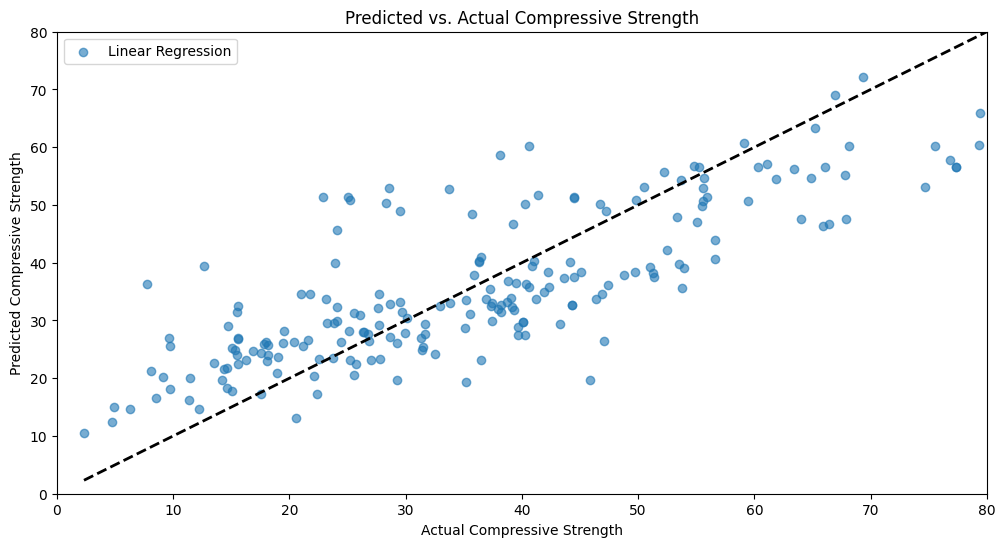

In [47]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_1, label="Linear Regression", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "k--", lw=2)
plt.xlim(0,80)  # Adjust the margin
plt.ylim(0,80)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Predicted vs. Actual Compressive Strength")
plt.legend()
plt.show()


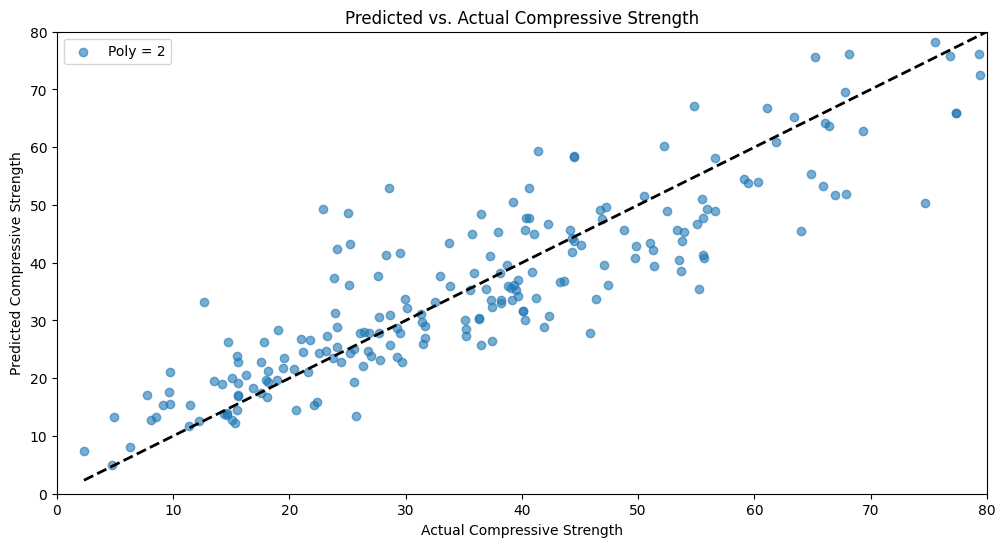

In [46]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_2, label="Poly = 2", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "k--", lw=2)
plt.xlim(0,80)  # Adjust the margin
plt.ylim(0,80)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Predicted vs. Actual Compressive Strength")
plt.legend()
plt.show()


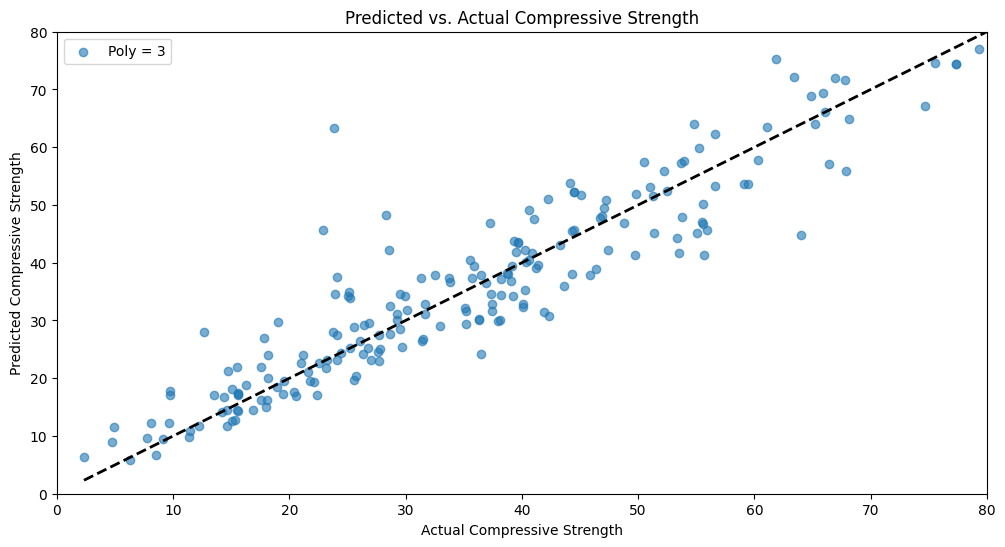

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_3, label="Poly = 3", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "k--", lw=2)
plt.xlim(0,80)  # Adjust the margin
plt.ylim(0,80)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Predicted vs. Actual Compressive Strength")
plt.legend()
plt.show()


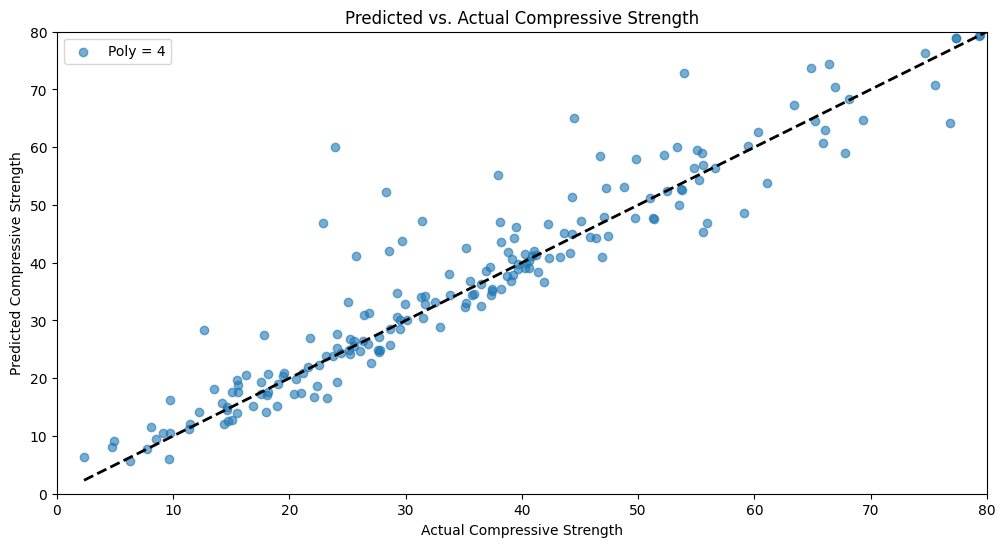

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_4, label="Poly = 4", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "k--", lw=2)
plt.xlim(0,80)  # Adjust the margin
plt.ylim(0,80)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Predicted vs. Actual Compressive Strength")
plt.legend()
plt.show()


more points around the line the better

# Bias-Variance Tradeoff

- Linear regression generally has high bias and low variance (underfitting).
- Higher-degree polynomial regression (especially k=4) has low bias but high variance (overfitting).
- The best tradeoff is likely at k=2 or k=3, where variance is reduced while still improving accuracy.

# Why higher order polynomials tend to overfit data?

Higher order polynomials bring in more parameters allowing the model flexibility to capture even small fluctuations in the data, which inevitably leads to overfitting, because instead of modelling the underlying relationship, it fits the function s.t it oscillates to reach every point in the dataset 